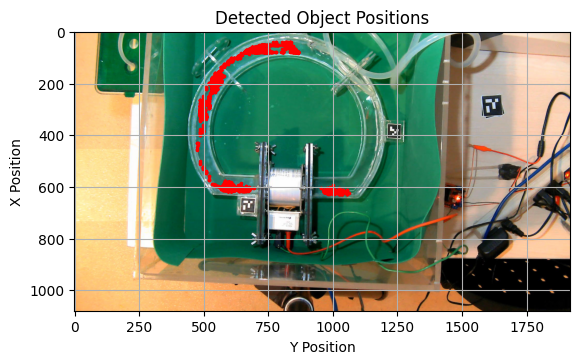

In [1]:
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image 
image = cv2.imread('blend_test.png')
# Load JSON data
path = 'Generated_data/Fish_data.json'
with open(path, 'r') as f:
    data = json.load(f)
# Filter data where 'detected' is true and 'centroid' exists
detected_data = [item['centroids'][0] for item in data if item.get('detected') and 'centroids' in item]
# Extract x and y positions
x_positions = [centroid[0] for centroid in detected_data]
y_positions = [centroid[1] for centroid in detected_data]

# Plot the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# Plot x and y data on top of the image
plt.scatter(x_positions, y_positions, color='red', marker='.', s=10)  # s=10 adjusts the size of the markers
plt.xlabel('Y Position')
plt.ylabel('X Position')
plt.title('Detected Object Positions')
plt.grid(True)
plt.show()

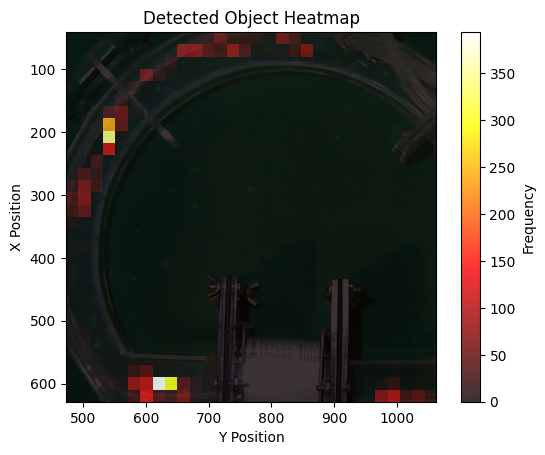

In [2]:
# Create a heatmap
heatmap, xedges, yedges = np.histogram2d(x_positions, y_positions, bins=30)

# Plot the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Plot the heatmap overlay
plt.imshow(heatmap.T, extent=[xedges[0], xedges[-1], yedges[-1], yedges[0]], alpha=0.8, cmap='hot')
plt.colorbar(label='Frequency')
plt.xlabel('Y Position')
plt.ylabel('X Position')
plt.title('Detected Object Heatmap')
plt.show()
